In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Reading Dataset

In [2]:
df_bplm_main = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_bplm_main.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print('')
print('Count of rows and columns present in Bank_Personal_Loan_Modelling.csv')
print('')
df_bplm_main.shape


Count of rows and columns present in Bank_Personal_Loan_Modelling.csv



(5000, 14)

In [4]:
df_bplm_main.isnull().values.any() # If there are any null values in data set

False

In [5]:
print('')
print('Info about Bank_Personal_Loan_Modelling.csv')
print('')
df_bplm_main.info()


Info about Bank_Personal_Loan_Modelling.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


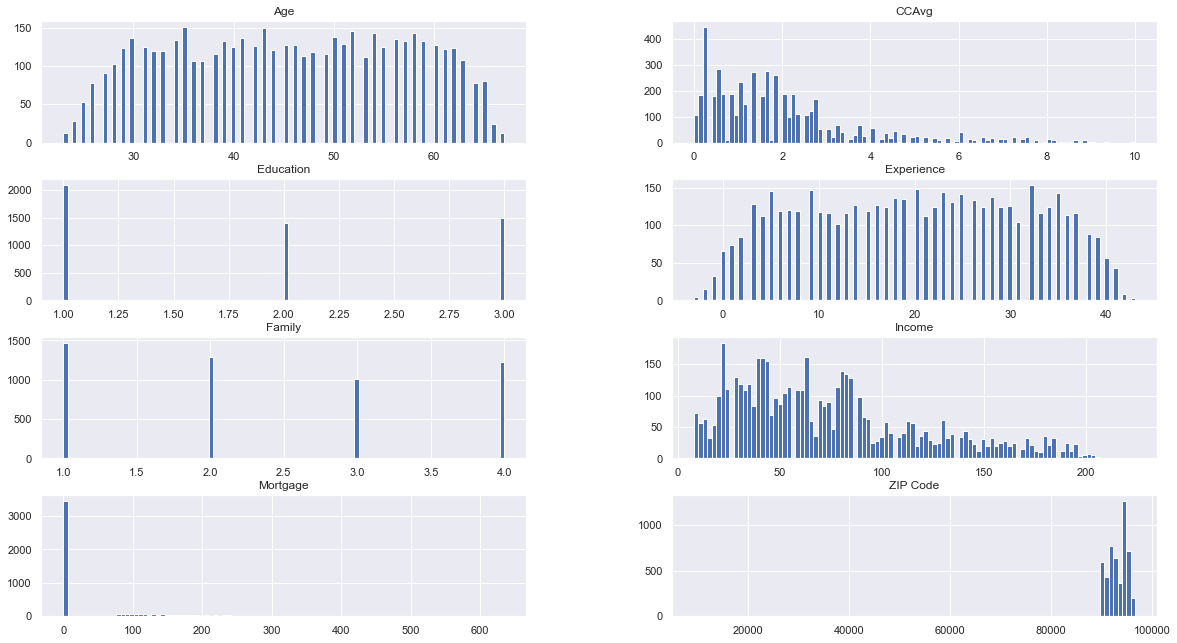

In [11]:
columns = list(df_bplm_main)[1:9] # Excluding Outcome column which has only 
df_bplm_main[columns].hist(stacked=False, bins=100, figsize=(20,40), layout=(14,2)); 
# Histogram of first 8 columns

In [12]:
df_bplm_main.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
# correlation in graphical representation
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

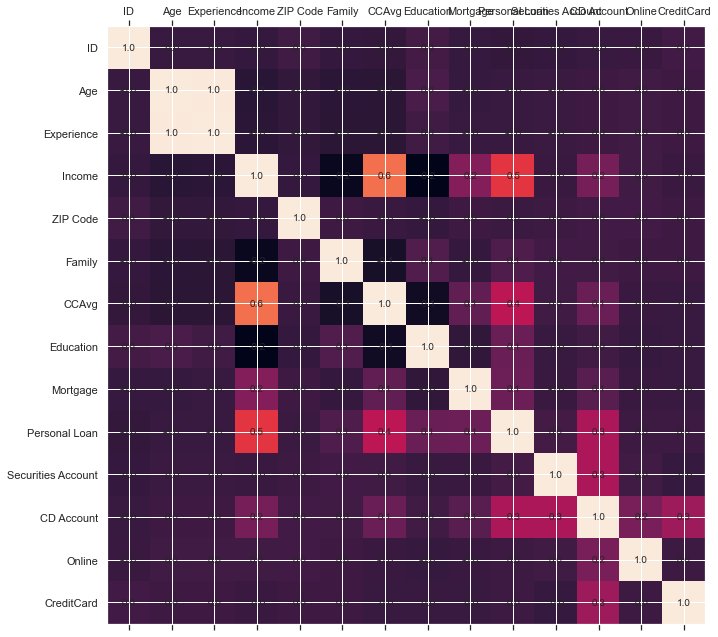

In [14]:
plot_corr(df_bplm_main)

We can see none of variable have correlation with any other variables.

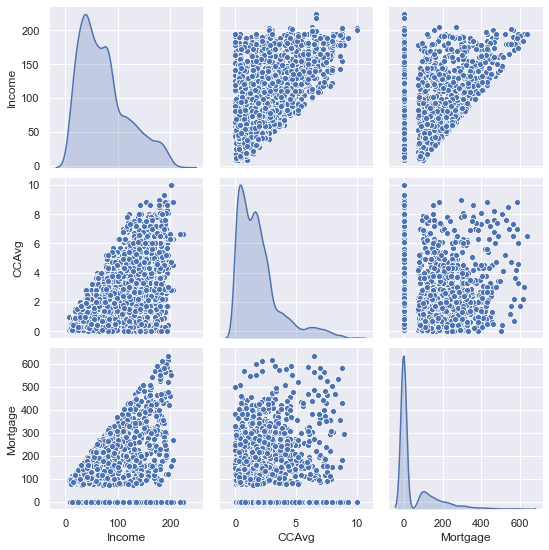

In [16]:
sns.pairplot(df_bplm_main[['Income', 'CCAvg', 'Mortgage']],diag_kind='kde')

Calculate loan acceptance ratio of True/False from outcome variable - Personal Loan

In [17]:
n_true = len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == True])
n_false = len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == False])
print("Number of loans accepted: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of loans not accepted: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of loans accepted: 480 (9.60%)
Number of loans not accepted: 4520 (90.40%)


So we have 9.60% people in current data set who have accepted a personal loan and rest of 90.40% have not accepted. 

It is a good distribution True/False cases of loan acceptance in data.

Data Preparation
Check hidden missing values
As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.


In [18]:
df_bplm_main.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In the columns which have zero, they are valid values. So we will not impute the data

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [19]:
from sklearn.model_selection import train_test_split

X = df_bplm_main.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df_bplm_main['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


Lets check split of data

In [21]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_bplm_main.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_bplm_main.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check loan acceptance True/False ratio in split data

In [23]:
print("Original loan acceptance True Values    : {0} ({1:0.2f}%)".format(len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == 1]), (len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == 1])/len(df_bplm_main.index)) * 100))
print("Original loan acceptance False Values   : {0} ({1:0.2f}%)".format(len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == 0]), (len(df_bplm_main.loc[df_bplm_main['Personal Loan'] == 0])/len(df_bplm_main.index)) * 100))
print("")
print("Training loan acceptance True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training loan acceptance False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test loan acceptance True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test loan acceptance False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original loan acceptance True Values    : 480 (9.60%)
Original loan acceptance False Values   : 4520 (90.40%)

Training loan acceptance True Values    : 331 (9.46%)
Training loan acceptance False Values   : 3169 (90.54%)

Test loan acceptance True Values        : 149 (9.93%)
Test loan acceptance False Values       : 1351 (90.07%)



The data split into training and test data seems to follow the same pattern as original data

## Logistic Regression

In [24]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.000036 -0.00058 -0.001399  0.036103 -0.000065  0.008596  0.005785   

          7        8         9        10        11        12  intercept  
0  0.009346  0.00086  0.000303  0.002693 -0.000092 -0.000031   -0.00006  


In [25]:
model_score = model.score(x_test, y_test)
print(model_score)

0.908


In [57]:
print('Confusion Matrix')
my_matrix = metrics.confusion_matrix(y_test, y_predict)
print(my_matrix)

Confusion Matrix
[[1319   32]
 [ 106   43]]


In [58]:
def _draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix Heatmap


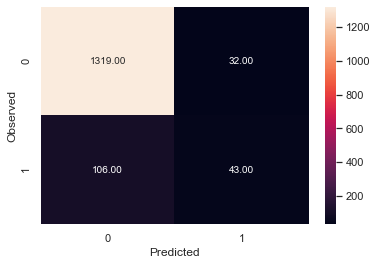

None


In [60]:
print('Confusion Matrix Heatmap')
print(_draw_cm(y_test,y_predict))

The confusion matrix

True Positives (TP): we correctly predicted that they accept personal loan 43

True Negatives (TN): we correctly predicted that they don't accept personal loan 1319

False Positives (FP): we incorrectly predicted that they accept personal loan (a "Type I error") 32 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't accept personal loan (a "Type II error") 106 Falsely predict negative Type II error

In [43]:
print()
print("Accuracy:",accuracy_score(y_test,y_predict))
print()


Accuracy: 0.908



In [39]:
print()
print("Recall:",recall_score(y_test,y_predict))
print()


Recall: 0.28859060402684567



In [40]:
print()
print("Precision:",precision_score(y_test,y_predict))
print()


Precision: 0.5733333333333334



In [41]:
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()


F1 Score: 0.38392857142857145



In [42]:
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print()


Roc Auc Score: 0.6324522228128306



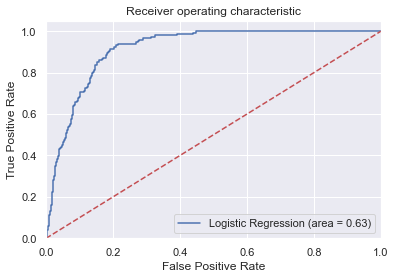

In [83]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Coefficients of attributes

In [44]:
print(model.coef_, model.intercept_)

[[-3.64933941e-05 -5.79559091e-04 -1.39890184e-03  3.61027970e-02
  -6.45033239e-05  8.59611417e-03  5.78453609e-03  9.34553643e-03
   8.59847124e-04  3.03014773e-04  2.69322597e-03 -9.23976123e-05
  -3.12626825e-05]] [-5.96372722e-05]


In [81]:
pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_.tolist()[0])), columns=['Column', 'coef'])

,Column,coef
0,ID,-0.000036
1,Age,-0.000580
2,Experience,-0.001399
3,Income,0.036103
4,ZIP Code,-0.000065
5,Family,0.008596
6,CCAvg,0.005785
7,Education,0.009346
8,Mortgage,0.000860
9,Securities Account,0.000303


## Conclusion

1. The model is ~ 90% accurate
2. Based on the confusion matrix, 
     True Positives (TP): we correctly predicted that 43 people will accept personal loan
     True Negatives (TN): we correctly predicted that 1319 people will not accept personal loan
     False Positives (FP): we incorrectly predicted that 32 people will accept personal loan (a "Type I error")
     False Negatives (FN): we incorrectly predicted that 106 people will not accept personal loan (a "Type II error")
3. Income seems to be the main factor that determines if a person will accept a personal loan or not based on a positive coefficient value ~0.4
4. The rest of the columns do not play a significant part in acceptance of loan, based on coefficient values being closer to or less than zero